| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./7_Machine_Learning.ipynb)| [⏩](./9_Machine_Learning.ipynb)|

# **71. Árboles de decisión Intuición geométrica | Entropía | Impureza de Gini | Ganancia de información**

**Árboles de Decisión:**

Los árboles de decisión son modelos predictivos que toman decisiones basadas en reglas de decisión. Cada nodo en el árbol representa una pregunta sobre una característica, y las ramas representan las posibles respuestas a esa pregunta. Las hojas del árbol contienen las predicciones.

**Entropía:**

La entropía mide la impureza o desorden en un conjunto de datos. En el contexto de los árboles de decisión, se utiliza para evaluar qué tan bien un nodo particiona los datos.

**Impureza de Gini:**

La impureza de Gini es otra medida de la impureza en un conjunto de datos. Es la probabilidad de clasificar incorrectamente una instancia aleatoria.

**Ganancia de Información:**

La ganancia de información mide cuánto la partición de un conjunto de datos reduce la entropía o la impureza. Un nodo con alta ganancia de información es preferido.

**Ejemplo en Código:**

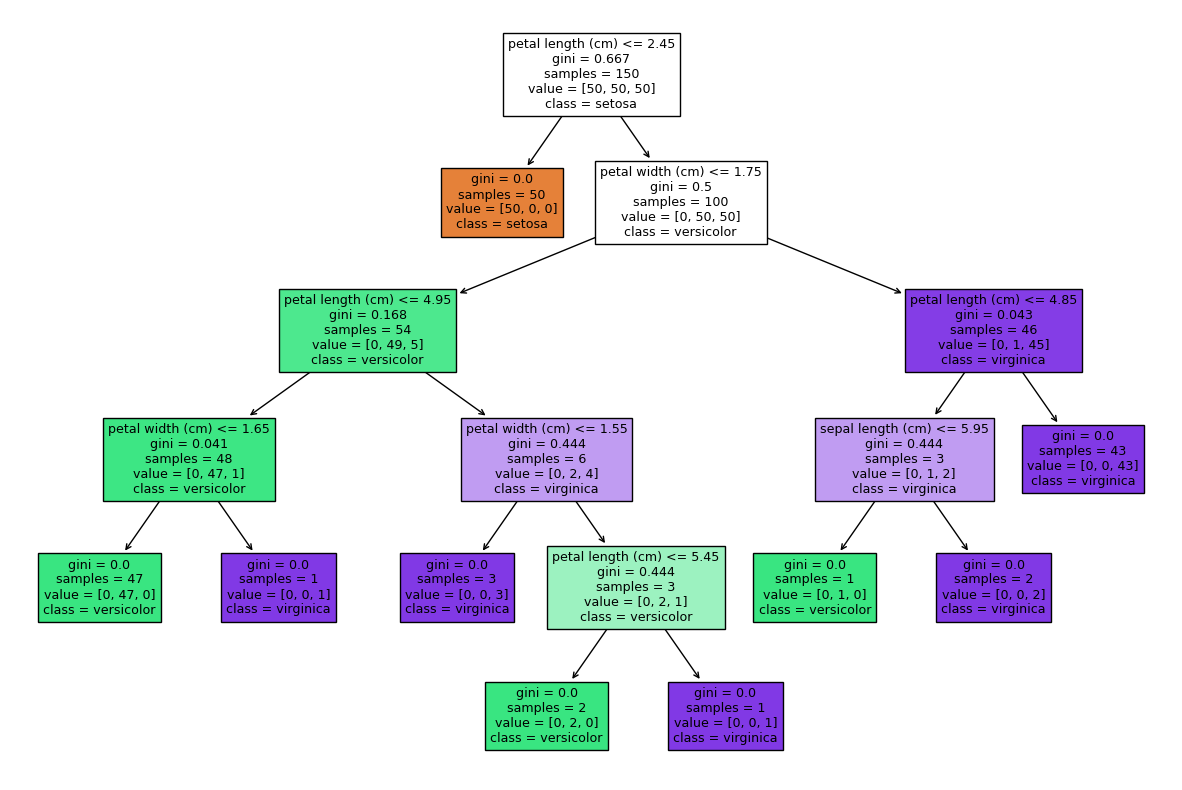

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2

Feature Importance: [0.01333333 0.         0.56405596 0.42261071]
Gini Impurity: -2.0


In [1]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Crear un clasificador de árboles de decisión
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

# Convertir iris.target_names a una lista
class_names = list(iris.target_names)

# Visualizar el árbol de decisión
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=class_names,  # Usar la lista convertida
                   filled=True)

plt.show()

# Mostrar reglas de decisión
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

# Calcular la ganancia de información y la impureza de Gini
# (Esto es solo un ejemplo, no necesario para el código anterior)
# Puedes usar estas métricas para evaluar la importancia de las características en el modelo.
feature_importance = clf.feature_importances_

# Calcular la impureza de Gini
gini_impurity = 1 - sum((i / sum(y == class_label))**2 for class_label, i in enumerate(np.bincount(y)))

print(f'Feature Importance: {feature_importance}')
print(f'Gini Impurity: {gini_impurity}')

Este código utiliza el conjunto de datos Iris para construir un árbol de decisión y visualizarlo. La función `export_text` muestra las reglas de decisión. La ganancia de información y la impureza de Gini se calculan para evaluar la importancia de las características.

# **72. Árboles de decisión: hiperparámetros | Sobreajuste y desajuste en árboles de decisión**

**Hiperparámetros de Árboles de Decisión:**

Los árboles de decisión tienen varios hiperparámetros que pueden ajustarse para controlar su comportamiento. Algunos de los más importantes incluyen:

1. **Profundidad del árbol (`max_depth`):** La máxima profundidad del árbol. Controla cuántos niveles de decisiones puede tomar el árbol.

2. **Número mínimo de muestras para dividir un nodo (`min_samples_split`):** El número mínimo de muestras requeridas en un nodo para que se divida en dos nodos hijos.

3. **Número mínimo de muestras en una hoja (`min_samples_leaf`):** El número mínimo de muestras que debe haber en una hoja. Este parámetro controla el tamaño mínimo de una hoja.

4. **Número mínimo de nodos requeridos para dividir (`min_weight_fraction_leaf`):** Similar a `min_samples_leaf`, pero expresado como una fracción del número total de observaciones.

**Sobreajuste y Desajuste en Árboles de Decisión:**

- **Sobreajuste (Overfitting):** Ocurre cuando el modelo se ajusta demasiado a los datos de entrenamiento, capturando el ruido y patrones específicos de esos datos que no son representativos del conjunto de datos en general. Puede resultar en un rendimiento deficiente en nuevos datos.

- **Desajuste (Underfitting):** Ocurre cuando el modelo es demasiado simple para capturar la estructura subyacente de los datos. Como resultado, el modelo tiene un rendimiento deficiente tanto en los datos de entrenamiento como en los nuevos datos.

**Ejemplo en Código:**

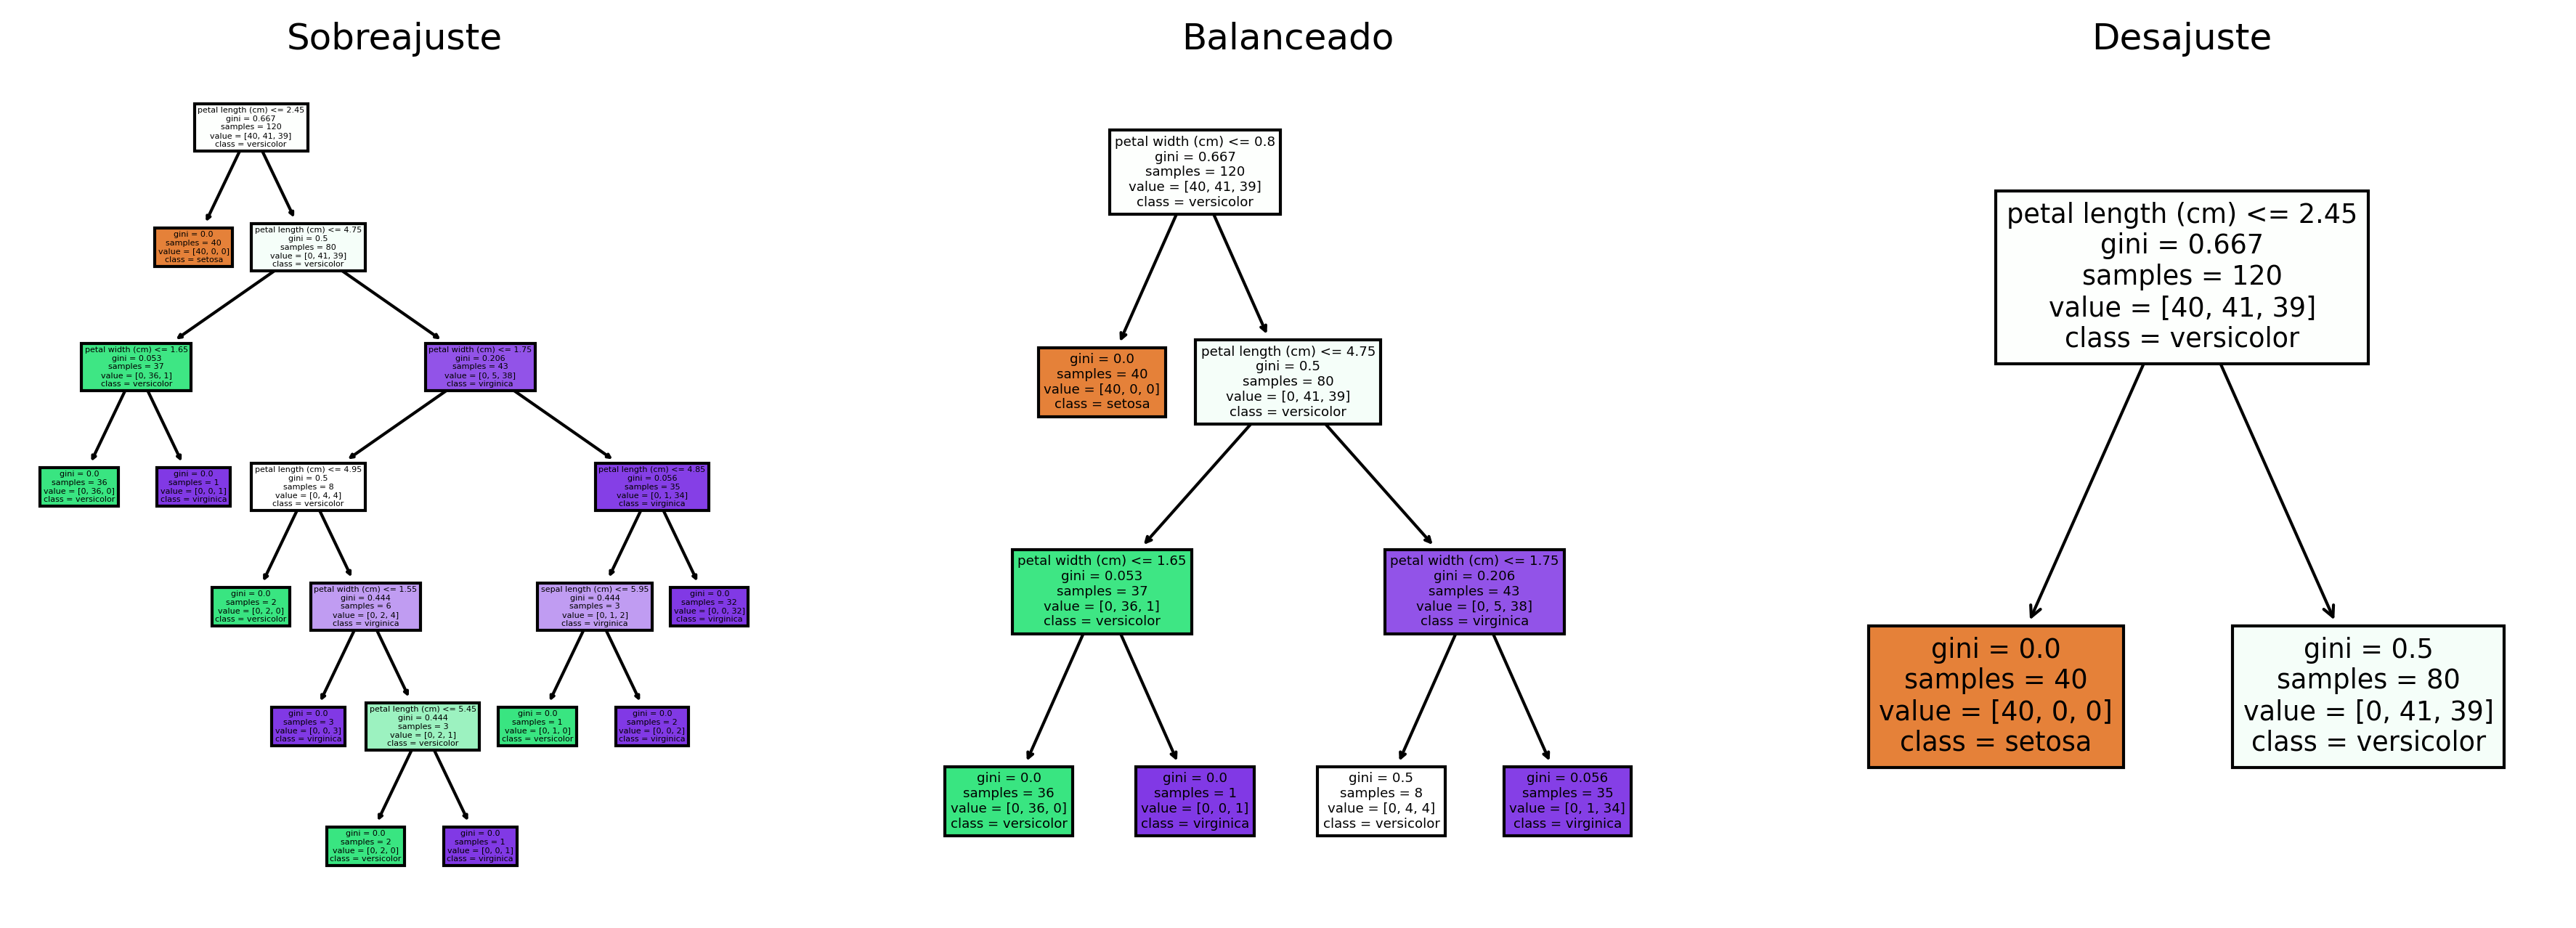

In [2]:
# Importar bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un árbol de decisión con diferentes hiperparámetros
tree_overfit = DecisionTreeClassifier(max_depth=None)  # Profundidad ilimitada (sobreajuste)
tree_balanced = DecisionTreeClassifier(max_depth=3)  # Profundidad limitada (balanceado)
tree_underfit = DecisionTreeClassifier(max_depth=1)  # Profundidad mínima (desajuste)

# Ajustar los modelos
tree_overfit.fit(X_train, y_train)
tree_balanced.fit(X_train, y_train)
tree_underfit.fit(X_train, y_train)

# Visualizar los árboles
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=300)

# Convertir iris.target_names a una lista
class_names = list(iris.target_names)

plot_tree(tree_overfit, filled=True, feature_names=iris.feature_names, class_names=class_names, ax=axes[0])
axes[0].set_title('Sobreajuste')

plot_tree(tree_balanced, filled=True, feature_names=iris.feature_names, class_names=class_names, ax=axes[1])
axes[1].set_title('Balanceado')

plot_tree(tree_underfit, filled=True, feature_names=iris.feature_names, class_names=class_names, ax=axes[2])
axes[2].set_title('Desajuste')

plt.show()

En este ejemplo, creamos tres modelos de árboles de decisión con diferentes niveles de profundidad. Observa cómo el primer árbol tiene una profundidad ilimitada (sobreajuste), el segundo tiene una profundidad limitada (balanceado) y el tercero tiene la profundidad mínima (desajuste). La visualización de los árboles nos ayuda a entender cómo cada modelo toma decisiones en diferentes situaciones.

# **73. Árboles de regresión | Árboles de decisión**

**Árboles de Regresión:**

A diferencia de los árboles de decisión para clasificación, que predicen una etiqueta de clase, los árboles de regresión predicen un valor numérico en cada hoja del árbol. La tarea principal es predecir un valor continuo en lugar de asignar una clase. El proceso de construcción del árbol es similar, pero en lugar de buscar la característica que maximiza la ganancia de información, se busca la característica que minimiza el error cuadrático medio (MSE).

**Ejemplo en Código:**

Vamos a utilizar un conjunto de datos simple para ilustrar el concepto de árboles de regresión. En este caso, usaremos la función seno y agregaremos algo de ruido para simular datos reales.

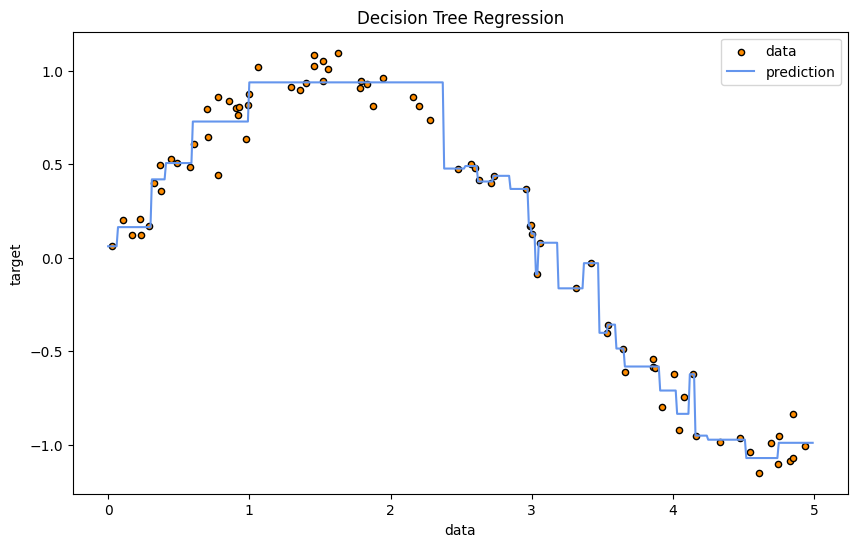

In [3]:
# Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generar datos de ejemplo
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Crear un árbol de regresión
regressor = DecisionTreeRegressor(max_depth=5)
regressor.fit(X, y)

# Predecir valores para nuevos datos
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Este código crea un conjunto de datos sintéticos basado en la función seno, agrega ruido y luego ajusta un árbol de regresión a los datos. La visualización muestra cómo el árbol de regresión predice los valores continuos a lo largo del rango de datos.

**Explicación del Código:**

1. **Generación de Datos:** Creamos datos de ejemplo utilizando la función seno y agregamos ruido para simular datos reales.

2. **Creación del Árbol de Regresión:** Creamos un objeto `DecisionTreeRegressor` y lo ajustamos a los datos de entrenamiento.

3. **Predicción:** Generamos datos de prueba y utilizamos el modelo para hacer predicciones.

4. **Visualización:** Mostramos los datos originales, la predicción del modelo y la estructura del árbol en una gráfica.

Este ejemplo ilustra cómo los árboles de regresión pueden adaptarse a patrones no lineales en los datos y cómo capturan la relación entre las características de entrada y la variable objetivo continua.

# **74. Introducción al aprendizaje conjunto, Técnicas de conjunto en aprendizaje automático**

El aprendizaje conjunto (ensemble learning) es una técnica en el campo del aprendizaje automático que combina las predicciones de varios modelos para mejorar la precisión y el rendimiento general del modelo. La idea básica es que la combinación de múltiples modelos dé lugar a un modelo más robusto y generalizable que cada modelo individual por separado. Hay varias técnicas de conjunto, y dos de las más comunes son el *Bagging* y el *Boosting*. A continuación, te proporcionaré una introducción a estas técnicas junto con ejemplos en código utilizando Python y las bibliotecas scikit-learn y matplotlib.

**Bagging (Bootstrap Aggregating):**

El Bagging es una técnica que combina múltiples modelos independientes entrenados en conjuntos de datos de entrenamiento creados mediante remuestreo con reemplazo (bootstrap). Un ejemplo popular de Bagging es el algoritmo Random Forest.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy}')

Precisión del Random Forest: 1.0


**Boosting:**

El Boosting es otra técnica que entrena modelos secuencialmente, donde cada modelo intenta corregir los errores del modelo anterior. Un ejemplo popular de Boosting es el algoritmo AdaBoost.

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear un clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Entrenar el modelo
adaboost_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = adaboost_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del AdaBoost: {accuracy}')

Precisión del AdaBoost: 1.0



Estos son solo ejemplos básicos para ilustrar el concepto. La elección entre Bagging y Boosting, así como la configuración de los hiperparámetros, dependerá del problema específico y de la naturaleza de los datos. Además, es importante tener en cuenta que estas técnicas pueden utilizarse con diferentes algoritmos base, no solo con los mencionados en los ejemplos.

En cuanto a la visualización, puedes utilizar herramientas como `matplotlib` para visualizar la importancia de las características en el caso de Random Forest o el rendimiento del modelo a medida que se agregan más clasificadores en el caso de AdaBoost. Sin embargo, las visualizaciones específicas pueden variar según el problema y la biblioteca utilizada.

# **75. Conjunto de votación, Introducción e idea central**

El conjunto de votación (voting ensemble) es una técnica de aprendizaje conjunto que combina las predicciones de varios modelos de machine learning para obtener una predicción final. La idea central detrás del conjunto de votación es aprovechar la diversidad de múltiples modelos para mejorar la precisión y generalización del modelo combinado. Hay dos tipos principales de conjuntos de votación: el voto duro (hard voting) y el voto suave (soft voting).

1. **Voto Duro (Hard Voting):** En el voto duro, cada modelo en el conjunto emite una predicción y la clase que obtiene la mayoría de votos se elige como la predicción final.

2. **Voto Suave (Soft Voting):** En el voto suave, en lugar de contar las votaciones, se suman las probabilidades de predicción de cada modelo y la clase con la mayor suma se elige como la predicción final. Este enfoque es efectivo cuando los modelos en el conjunto pueden proporcionar probabilidades de clase.

A continuación, te mostraré ejemplos en código utilizando Python y la biblioteca scikit-learn.

**Ejemplo de Voto Duro:**

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear clasificadores individuales
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(random_state=42)

# Crear un conjunto de votación (voto duro)
voting_clf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='hard')

# Entrenar el conjunto de votación
voting_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = voting_clf.predict(X_test)

# Calcular la precisión del conjunto de votación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del conjunto de votación (voto duro): {accuracy}')

Precisión del conjunto de votación (voto duro): 1.0


**Ejemplo de Voto Suave:**

In [7]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Crear clasificadores individuales
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(random_state=42)

# Crear un conjunto de votación (voto suave)
voting_clf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='soft')

# Entrenar el conjunto de votación
voting_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = voting_clf.predict(X_test)

# Calcular la precisión del conjunto de votación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del conjunto de votación (voto suave): {accuracy}')

Precisión del conjunto de votación (voto suave): 1.0


**Visualización:**
La visualización de un conjunto de votación puede ser desafiante debido a la combinación de varios modelos. Sin embargo, puedes visualizar la importancia de las características individualmente para cada modelo dentro del conjunto o realizar visualizaciones comparativas de las métricas de rendimiento, como la precisión, entre los modelos individuales y el conjunto de votación.

Es importante tener en cuenta que la elección entre voto duro y voto suave dependerá del problema específico y de las características de los modelos en el conjunto. En general, los conjuntos de votación pueden proporcionar mejoras significativas en la precisión y robustez del modelo final.

# **76. Conjunto de votación, Clasificación, Clasificador de votación, Voto duro versus voto blando**

El conjunto de votación es una técnica en aprendizaje conjunto que combina las predicciones de varios clasificadores para obtener una predicción final. Los clasificadores individuales pueden ser diferentes algoritmos de aprendizaje o incluso el mismo algoritmo con diferentes configuraciones. Existen dos enfoques principales en el conjunto de votación: el voto duro (hard voting) y el voto suave (soft voting).

**Voto Duro (Hard Voting):**

En el voto duro, cada clasificador en el conjunto emite una predicción y la clase que obtiene la mayoría de votos se elige como la predicción final.

**Voto Suave (Soft Voting):**

En el voto suave, en lugar de contar las votaciones, se suman las probabilidades de predicción de cada clasificador y la clase con la mayor suma se elige como la predicción final. Este enfoque es efectivo cuando los clasificadores en el conjunto pueden proporcionar probabilidades de clase.

**Ejemplos en Código:**

A continuación, proporcionaré ejemplos en código utilizando Python y la biblioteca scikit-learn para ilustrar ambos enfoques.

**Voto Duro:**

Precisión del conjunto de votación (voto duro): 0.8666666666666667


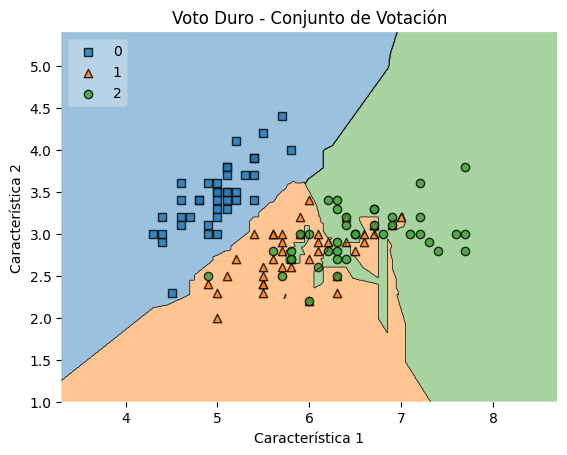

In [8]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Crear clasificadores individuales
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(random_state=42)

# Crear un conjunto de votación (voto duro)
voting_clf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='hard')

# Entrenar el conjunto de votación
voting_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = voting_clf.predict(X_test)

# Calcular la precisión del conjunto de votación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del conjunto de votación (voto duro): {accuracy}')

# Visualización de la clasificación
plot_decision_regions(X_train, y_train, clf=voting_clf, legend=2)
plt.title('Voto Duro - Conjunto de Votación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Voto Suave:**

Precisión del conjunto de votación (voto suave): 0.7333333333333333


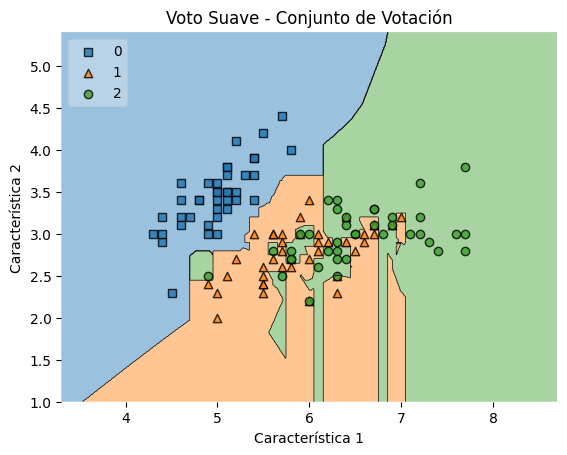

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Crear clasificadores individuales
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=3)
clf3 = LogisticRegression(random_state=42)

# Crear un conjunto de votación (voto suave)
voting_clf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('lr', clf3)], voting='soft')

# Entrenar el conjunto de votación
voting_clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = voting_clf.predict(X_test)

# Calcular la precisión del conjunto de votación
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del conjunto de votación (voto suave): {accuracy}')

# Visualización de la clasificación
plot_decision_regions(X_train, y_train, clf=voting_clf, legend=2)
plt.title('Voto Suave - Conjunto de Votación')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Visualización:**

La visualización en estos ejemplos muestra la frontera de decisión del conjunto de votación en el espacio de características. Puedes observar cómo el conjunto de votación utiliza la información de múltiples clasificadores para realizar la clasificación final. La elección entre voto duro y voto suave dependerá del problema y de las características de los clasificadores individuales. La visualización proporciona una manera intuitiva de entender cómo el conjunto de votación combina la información de los modelos base para mejorar la precisión de las predicciones.

# **77. Conjunto de votación, Regresión**

El conjunto de votación en el contexto de la regresión se refiere a la técnica de combinar las predicciones de varios modelos de regresión para obtener una predicción final. A diferencia de la clasificación, donde se trata de predecir clases, en la regresión estamos interesados en predecir valores numéricos.

La idea principal del conjunto de votación en regresión es utilizar la media (o alguna otra combinación ponderada) de las predicciones de varios modelos para mejorar la precisión y la estabilidad de la predicción final.

A continuación, proporcionaré un ejemplo en código utilizando Python y la biblioteca scikit-learn para ilustrar el conjunto de votación en regresión.

**Ejemplo en Código:**

Error cuadrático medio del conjunto de votación: 0.4610984358818226


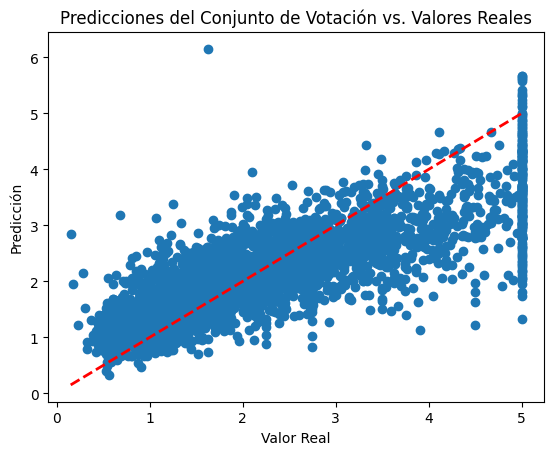

In [10]:
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar el conjunto de datos California Housing
california_housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(california_housing.data, california_housing.target, test_size=0.2, random_state=42)

# Crear modelos de regresión individuales
regressor1 = DecisionTreeRegressor(random_state=42)
regressor2 = KNeighborsRegressor(n_neighbors=3)
regressor3 = LinearRegression()

# Crear un conjunto de votación para regresión
voting_regressor = VotingRegressor(estimators=[('dt', regressor1), ('knn', regressor2), ('lr', regressor3)])

# Entrenar el conjunto de votación
voting_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = voting_regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio del conjunto de votación: {mse}')

# Visualización de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicciones del Conjunto de Votación vs. Valores Reales')
plt.show()

**Visualización:**

La visualización muestra una dispersión de puntos donde cada punto representa una instancia en el conjunto de prueba. La línea punteada en rojo representa la línea ideal donde las predicciones serían iguales a los valores reales. El conjunto de votación busca combinar las predicciones de los modelos base para reducir el error y mejorar la precisión en comparación con cada modelo individual.

Es importante tener en cuenta que el conjunto de votación en regresión es especialmente útil cuando los modelos base capturan diferentes aspectos o patrones de los datos. La elección de modelos base y la combinación de sus predicciones pueden ayudar a mejorar la generalización y la capacidad de adaptación del modelo conjunto.

# **78. Bagging, Introducción**

**Introducción a Bagging (Bootstrap Aggregating):**

Bagging, o Bootstrap Aggregating, es una técnica de aprendizaje conjunto (ensemble learning) que utiliza múltiples modelos de aprendizaje para mejorar la precisión y la estabilidad de las predicciones. La idea fundamental detrás del Bagging es entrenar múltiples modelos utilizando conjuntos de datos de entrenamiento ligeramente diferentes, creados mediante muestreo bootstrap. 

En términos sencillos, el muestreo bootstrap consiste en tomar muestras aleatorias con reemplazo del conjunto de datos original. Esto significa que una instancia puede aparecer varias veces en una muestra y algunas instancias pueden no aparecer en absoluto. Bagging utiliza este enfoque para crear múltiples conjuntos de datos de entrenamiento y entrena un modelo base en cada uno de ellos. Luego, las predicciones de estos modelos se promedian (en el caso de regresión) o se vota (en el caso de clasificación) para obtener la predicción final.

**Ejemplo en Código (Bagging con Random Forest):**

Vamos a implementar Bagging utilizando el algoritmo Random Forest, que es una variante específica de Bagging aplicada a árboles de decisión.

Precisión del Random Forest: 0.7666666666666667


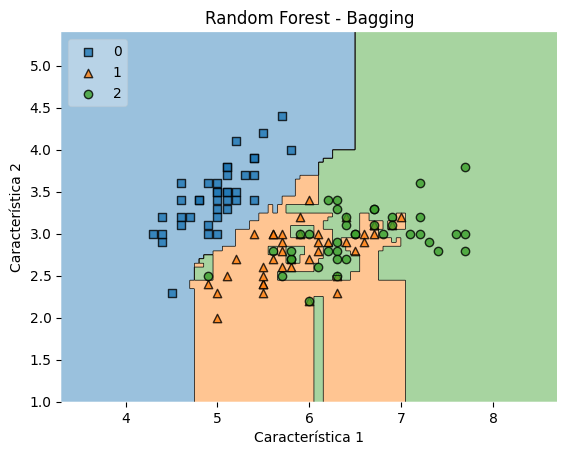

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Cargar el conjunto de datos Iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, :2], iris.target, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest: {accuracy}')

# Visualización de las regiones de decisión
plot_decision_regions(X_train, y_train, clf=rf_classifier, legend=2)
plt.title('Random Forest - Bagging')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Visualización:**

La visualización muestra las regiones de decisión creadas por el Random Forest en el espacio de características. Cada árbol de decisión en el bosque contribuye a la creación de estas regiones, y la combinación de múltiples árboles da como resultado una clasificación más robusta y generalizable.

La ventaja clave de Bagging, en este caso aplicado a Random Forest, es que ayuda a reducir la varianza del modelo al promediar múltiples estimaciones, lo que puede llevar a un mejor rendimiento en datos nuevos no vistos. Este enfoque es especialmente útil cuando se trabaja con modelos propensos al sobreajuste.

# **79. Bagging Ensemble, Bagging Classifiers**

**Bagging Ensemble y Bagging de Clasificadores:**

Bagging, o Bootstrap Aggregating, es una técnica de aprendizaje conjunto que implica entrenar varios modelos de aprendizaje en diferentes conjuntos de datos de entrenamiento para mejorar la robustez y precisión general del modelo. Cuando esta técnica se aplica a clasificadores, se le conoce como Bagging de Clasificadores.

**Bagging Ensemble:**

En Bagging Ensemble, el conjunto de modelos se entrena de manera paralela en diferentes subconjuntos de datos de entrenamiento. Cada subconjunto se crea mediante muestreo bootstrap, que es la selección de muestras con reemplazo del conjunto de datos original. Luego, las predicciones de cada modelo se combinan, típicamente tomando un voto mayoritario en el caso de clasificación o promediando en el caso de regresión, para formar la predicción final.

**Ejemplo en Código (Bagging de Clasificadores con Random Forest):**

Vamos a implementar Bagging de clasificadores utilizando el algoritmo Random Forest en un conjunto de datos de dos características para facilitar la visualización.

Precisión del Random Forest (Bagging): 1.0


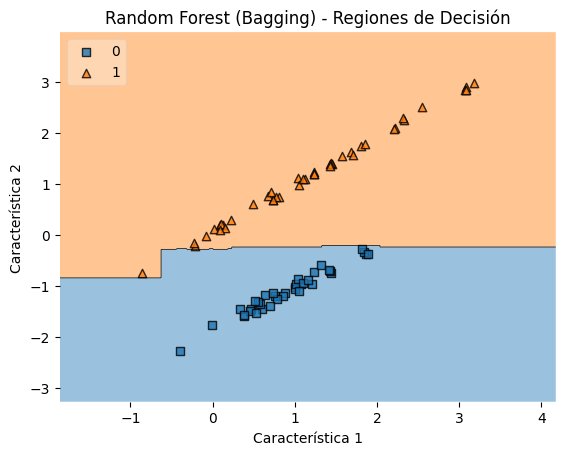

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Crear un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador Random Forest (Bagging de clasificadores)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Random Forest (Bagging): {accuracy}')

# Visualización de las regiones de decisión
plot_decision_regions(X_train, y_train, clf=rf_classifier, legend=2)
plt.title('Random Forest (Bagging) - Regiones de Decisión')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

**Visualización:**

La visualización muestra las regiones de decisión creadas por el Random Forest (Bagging) en el espacio de características. Cada árbol de decisión en el Random Forest contribuye a la creación de estas regiones, y la combinación de múltiples árboles mediante Bagging ayuda a reducir la varianza del modelo, lo que puede conducir a un mejor rendimiento en datos no vistos.

Bagging de Clasificadores, como se implementa en Random Forest, es eficaz para mejorar la precisión y la generalización del modelo al reducir la sobreajuste y proporcionar una predicción más robusta. Este enfoque es especialmente beneficioso cuando se trabaja con conjuntos de datos complejos y ruidosos.

# **80. Bagging Ensemble, Bagging Regressor**

**Bagging Ensemble y Bagging Regressor:**

Bagging, o Bootstrap Aggregating, es una técnica de aprendizaje conjunto que consiste en entrenar varios modelos de aprendizaje en diferentes subconjuntos de datos de entrenamiento para mejorar la robustez y la precisión general del modelo. Cuando se aplica a modelos de regresión, se le conoce como Bagging Regressor.

**Bagging Ensemble para Regresión:**

En Bagging Regressor, se sigue un proceso similar al Bagging de Clasificadores, pero en lugar de tomar un voto mayoritario, se promedian las predicciones de los modelos base para obtener la predicción final. Esto ayuda a reducir la varianza del modelo y mejora la generalización al trabajar con múltiples instancias del modelo base entrenadas en diferentes conjuntos de datos de entrenamiento.

**Ejemplo en Código (Bagging Regressor con Random Forest):**

Vamos a implementar Bagging Regressor utilizando el algoritmo Random Forest en un conjunto de datos de regresión.

Error cuadrático medio del Random Forest (Bagging Regressor): 160.99855696169863


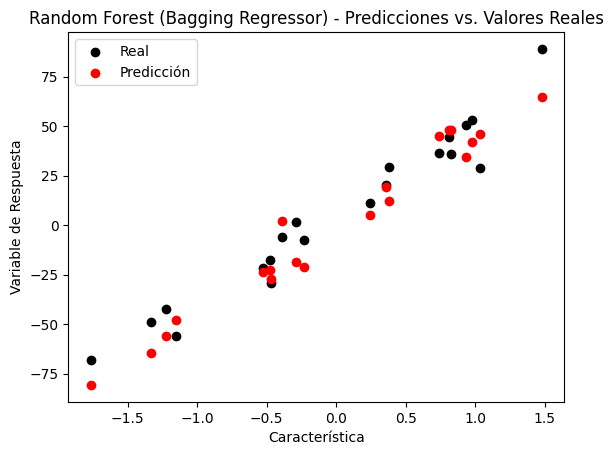

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Crear un conjunto de datos sintético para regresión
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un regresor Random Forest (Bagging Regressor)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio del Random Forest (Bagging Regressor): {mse}')

# Visualización de las predicciones vs. valores reales
plt.scatter(X_test, y_test, color='black', label='Real')
plt.scatter(X_test, y_pred, color='red', label='Predicción')
plt.title('Random Forest (Bagging Regressor) - Predicciones vs. Valores Reales')
plt.xlabel('Característica')
plt.ylabel('Variable de Respuesta')
plt.legend()
plt.show()

**Visualización:**

La visualización muestra las predicciones del modelo Random Forest (Bagging Regressor) en comparación con los valores reales en un conjunto de datos de regresión unidimensional. Observarás que el modelo tiene en cuenta la variabilidad en los datos y proporciona una predicción suavizada gracias a la combinación de múltiples modelos base entrenados en diferentes conjuntos de datos de entrenamiento.

Bagging Regressor es efectivo para mejorar la capacidad de generalización de modelos de regresión y reducir el sobreajuste, especialmente en situaciones donde hay ruido en los datos o cuando se trabaja con conjuntos de datos complejos.

| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./7_Machine_Learning.ipynb)| [⏩](./9_Machine_Learning.ipynb)|